In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
sys.path.append('utils')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from loader_utils import url_dframe
from datetime import timedelta
from Model_utils import *
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
weblink = "https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip"
df = url_dframe(weblink)
df.replace('', np.nan, inplace=True)

#### Feature Selection Explanation:
Numerical Features:\
'creditLimit': The maximum amount a person can spend. This could be relevant as fraudsters might target accounts with higher limits.\
'availableMoney': The amount available to spend. A sudden large transaction that's close to this limit might be suspicious.\
'transactionAmount': The amount of the transaction. Unusual transaction amounts could be indicative of fraud.\
'currentBalance': The current balance on the card. This gives context to the transaction amount.
#### Boolean Features:
'cardPresent': Whether the physical card was present for the transaction. Online transactions (card not present) might have a higher risk of fraud.

#### Time-based Features (derived):
'days_since_account_open': The age of the account. Newer accounts might be more susceptible to fraud.

#### Categorical Features (one-hot encoded):
'merchantName': Different merchants might have different fraud risks. \
'merchantCategoryCode': Different types of merchants might have different fraud risks.

In [3]:
date_columns = ['accountOpenDate', 'transactionDateTime']
df = date_time(date_columns, df)

df['days_since_account_open'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days
categorical_columns = ['merchantName', 'merchantCategoryCode']
df_encoded = frequency_encoding(df, categorical_columns)

# Select model featured
features = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance', 'cardPresent','days_since_account_open']
features += [col for col in df_encoded.columns if col.startswith(tuple(categorical_columns))]

X = df_encoded[features]
y = df_encoded['isFraud']

##### The model is run and saved. Additionally SHAP analysis is used to explain the output of machine learning models. It helps in understanding how much each feature contributes to the prediction for each instance in the dataset.

Random Forest Results:
Random Forest CV Score: 0.9846
Random Forest Test Accuracy: 0.9845
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    154780
        True       0.75      0.03      0.06      2493

    accuracy                           0.98    157273
   macro avg       0.87      0.52      0.53    157273
weighted avg       0.98      0.98      0.98    157273



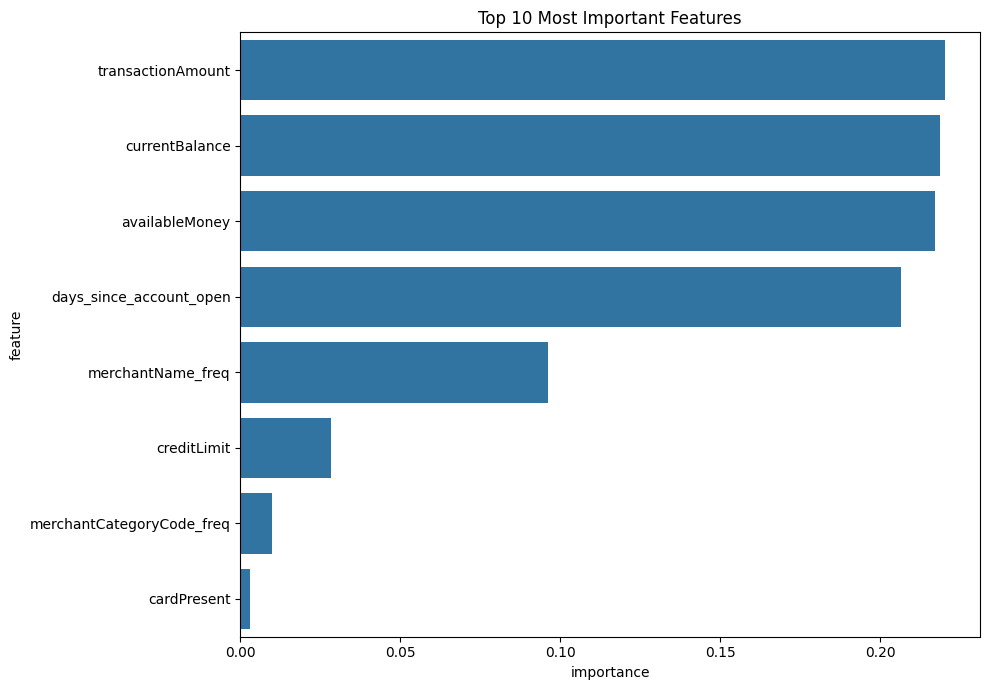

figs/Feature Importance for Random Forest saved as 'Random Forest_importance.png'


In [4]:
train_test_scaling = True
X_train_scaled, X_test_scaled, y_train, y_test = train_test_prep(X, y, train_test_scaling)

print("Random Forest Results:")
rf_score,best_rf_model = random_forest_cv(X_train_scaled, y_train)
print(f"Random Forest CV Score: {rf_score:.4f}")
y_pred_rf = best_rf_model.predict(X_test_scaled)

print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_feature_importance(best_rf_model, features, 'Random Forest')

In [ ]:
print("Gradient Boosting Classifier Results:")
gb_score, best_gb_model = gradient_boosting_cv(X_train_scaled, y_train)

# Save the Gradient Boosting model
print(f"Gradient Boosting Classifier CV Score: {gb_score:.4f}")
y_pred_gb = best_gb_model.predict(X_test_scaled)

print(f"Gradient Boosting Classifier Test Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))
plot_feature_importance(best_gb_model, features, 'Gradient Boosting')

Gradient Boosting Classifier Results:
